Bayesian Statistics Made Simple
===

Code and exercises from my workshop on Bayesian statistics in Python.

Copyright 2016 Allen Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
from scipy.special import gamma

from thinkbayes2 import Pmf, Suite
import thinkplot

Working with Pmfs
---
Create a Pmf object to represent a six-sided die.

In [2]:
d6 = Pmf()

A Pmf is a map from possible outcomes to their probabilities.

In [3]:
for x in [1,2,3,4,5,6]:
    d6[x] = 1

Initially the probabilities don't add up to 1.

In [4]:
d6.Print()

1 1
2 1
3 1
4 1
5 1
6 1


`Normalize` adds up the probabilities and divides through.  The return value is the total probability before normalizing.

In [5]:
d6.Normalize()

6

Now the Pmf is normalized.

In [6]:
d6.Print()

1 0.16666666666666666
2 0.16666666666666666
3 0.16666666666666666
4 0.16666666666666666
5 0.16666666666666666
6 0.16666666666666666


And we can compute its mean (which only works if it's normalized).

In [7]:
d6.Mean()

3.5

`Random` chooses a random value from the Pmf.

In [8]:
d6.Random()

5

`thinkplot` provides methods for plotting Pmfs in a few different styles.

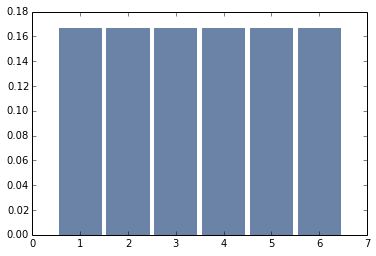

In [9]:
thinkplot.Hist(d6)

**Exercise 1:**  The Pmf object provides `__add__`, so you can use the `+` operator to compute the Pmf of the sum of two dice.

Compute and plot the Pmf of the sum of two 6-sided dice.

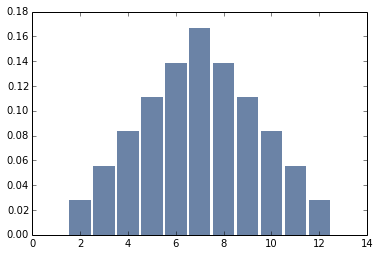

In [10]:
# Solution goes here
thinkplot.Hist(d6 + d6)

**Exercise 2:** Suppose I roll two dice and tell you the result is greater than 3.

Plot the Pmf of the remaining possible outcomes and compute its mean.

7.393939393939394


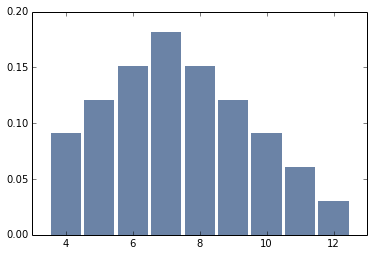

In [13]:
# Solution goes here
pd6 = d6 + d6
pd6[2] = 0
pd6[3] = 0
pd6.Normalize()
thinkplot.hist(pd6)
print(pd6.Mean())

The cookie problem
---
Create a Pmf with two equally likely hypotheses.


In [14]:
cookie = Pmf(['Bowl 1', 'Bowl 2'])
cookie.Print()

Bowl 1 0.5
Bowl 2 0.5


Update each hypothesis with the likelihood of the data (a vanilla cookie).

In [15]:
cookie['Bowl 1'] *= 0.75
cookie['Bowl 2'] *= 0.5
cookie.Normalize()

0.625

Print the posterior probabilities.

In [16]:
cookie.Print()

Bowl 1 0.6000000000000001
Bowl 2 0.4


**Exercise 3:** Suppose we put the first cookie back, stir, choose again from the same bowl, and get a chocolate cookie.

Hint: The posterior (after the first cookie) becomes the prior (before the second cookie).

In [ ]:
# Solution goes here

**Exercise 4:** Instead of doing two updates, what if we collapse the two pieces of data into one update?

Re-initialize `Pmf` with two equally likely hypotheses and perform one update based on two pieces of data, a vanilla cookie and a chocolate cookie.

The result should be the same regardless of how many updates you do (or the order of updates).

In [ ]:
# Solution goes here

The dice problem
---
Create a Suite to represent dice with different numbers of sides.

In [17]:
suite = Suite([4, 6, 8, 12])
suite.Print()

4 0.25
6 0.25
8 0.25
12 0.25


**Exercise 5:** We'll solve this problem two ways.  First we'll do it "by hand", as we did with the cookie problem; that is, we'll multiply each hypothesis by the likelihood of the data, and the renormalize.

In the space below, update `suite` based on the likelihood of the data (rolling a 6), then normalize and print the results.

In [18]:
# Solution goes here
suite[4] = 0
suite[6] = 1 / 6
suite[8] = 1 / 8
suite[12] = 1 / 12
suite.Normalize()
suite.Print()

4 0.0
6 0.4444444444444444
8 0.3333333333333333
12 0.2222222222222222


**Exercise 6:**  Now let's do the same calculation using `Suite.Update`.

Write a definition for a new class called `Dice` that extends `Suite`.  Then define a method called `Likelihood` that takes `data` and `hypo` and returns the probability of the data (the outcome of rolling the die) for a given hypothesis (number of sides on the die).

Hint: What should you do if the outcome exceeds the hypothetical number of sides on the die?

Here's an outline to get you started:

In [ ]:
class Dice(Suite):
        # hypo is the number of sides on the die
        # data is the outcome
        def Likelihood(self, data, hypo):
            return 1

In [ ]:
# Solution goes here

Now we can create a `Dice` object and update it.

In [ ]:
dice = Dice([4, 6, 8, 12])
dice.Update(6)
dice.Print()

If we get more data, we can perform more updates.

In [ ]:
for roll in [8, 7, 7, 5, 4]:
    dice.Update(roll)

Here are the results.

In [ ]:
dice.Print()

The German tank problem
---
The German tank problem is actually identical to the dice problem.

In [ ]:
class Tank(Suite):
    # hypo is the number of tanks
    # data is an observed serial number
    def Likelihood(self, data, hypo):
        if data > hypo:
            return 0
        else:
            return 1 / hypo

Here are the posterior probabilities after seeing Tank #37.

In [ ]:
tank = Tank(range(100))
tank.Update(37)
thinkplot.Pdf(tank)
tank.Mean()

**Exercise 7:**  Suppose we see another tank with serial number 17.  What effect does this have on the posterior probabilities?

Update the suite again with the new data and plot the results.

In [ ]:
# Solution goes here

The Euro problem
---

**Exercise 8:**  Write a class definition for `Euro`, which extends `Suite` and defines a likelihood function that computes the probability of the data (heads or tails) for a given value of `x` (the probability of heads).

Note that `hypo` is in the range 0 to 100.  Here's an outline to get you started.

In [ ]:
class Euro(Suite):
    
    def Likelihood(self, data, hypo):
        """ 
        hypo is the prob of heads (0-100)
        data is a string, either 'H' or 'T'
        """
        return 1

In [ ]:
# Solution goes here

We'll start with a uniform distribution from 0 to 100.

In [ ]:
euro = Euro(range(101))
thinkplot.Pdf(euro)

Now we can update with a single heads:

In [ ]:
euro.Update('H')
thinkplot.Pdf(euro)

Another heads:

In [ ]:
euro.Update('H')
thinkplot.Pdf(euro)

And a tails:

In [ ]:
euro.Update('T')
thinkplot.Pdf(euro)

Starting over, here's what it looks like after 7 heads and 3 tails.

In [ ]:
euro = Euro(range(101))

for outcome in 'HHHHHHHTTT':
    euro.Update(outcome)

thinkplot.Pdf(euro)
euro.MaximumLikelihood()

The maximum posterior probability is 70%, which is the observed proportion.

Here are the posterior probabilities after 140 heads and 110 tails.

In [ ]:
euro = Euro(range(101))

evidence = 'H' * 140 + 'T' * 110
for outcome in evidence:
    euro.Update(outcome)
    
thinkplot.Pdf(euro)

The posterior mean s about 56%

In [ ]:
euro.Mean()

So is the value with maximum posterior probability.

In [ ]:
euro.MaximumLikelihood()

The posterior credible interval has a 90% chance of containing the true value (provided that the prior distribution truly represents our background knowledge).

In [ ]:
euro.CredibleInterval(90)

The World Cup Problem
---
We'll use λ to represent the hypothetical goal-scoring rate in goals per game.

To compute prior probabilities for values of λ, we'll use a Gamma distribution.

In [ ]:
def EvalGammaPdf(lam, a):
    """Computes the Gamma PDF.

    lam: where to evaluate the PDF
    a: parameter of the gamma distribution

    returns: float probability
    """
    return lam**(a-1) * math.exp(-lam) / gamma(a)

`MakeGammaPmf` takes a list of hypothetical rates and returns a Pmf object.

In [ ]:
def MakeGammaPmf(lams, a):
    """Makes a PMF discrete approx to a Gamma distribution.

    lam: parameter lambda in events per unit time
    xs: upper bound of the Pmf

    returns: normalized Pmf
    """
    pmf = Pmf()
    for lam in lams:
        pmf[lam] = EvalGammaPdf(lam, a)
        
    pmf.Normalize()
    return pmf

Here's what the prior looks like.  I chose the parameter to yield a mean close to 1.3, which is the average number of goals per team per game in World Cup play.

In [ ]:
xs = np.linspace(0, 8, 101)
pmf = MakeGammaPmf(xs, 1.3)
thinkplot.Pdf(pmf)
thinkplot.Config(xlabel='Goals per game')
pmf.Mean()

**Exercise 9:**  Write a class called `Soccer` that extends `Suite` and defines `Likelihood`, which should compute the probability of the data (the time between goals in minutes) for a hypothetical goal-scoring rate, `lam`, in goals per game.

Hint: For a given value of `lam`, the time between goals is distributed exponentially.

Here's an outline to get you started:

In [ ]:
class Soccer(Suite):
    """Represents hypotheses about goal-scoring rates."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: scoring rate in goals per game
        data: interarrival time in minutes
        """
        return 1

In [ ]:
# Solution goes here

Now we can create a `Soccer` object and initialize it with the prior Pmf:

In [ ]:
soccer = Soccer(pmf)
thinkplot.Pdf(soccer)
thinkplot.Config(xlabel='Goals per game')
soccer.Mean()

Here's the update after first goal at 11 minutes.

In [ ]:
thinkplot.Pdf(soccer, color='0.7')
soccer.Update(11)
thinkplot.Pdf(soccer)
thinkplot.Config(xlabel='Goals per game')
soccer.Mean()

Here's the update after the second goal at 23 minutes (the time between first and second goals is 12 minutes).


In [ ]:
thinkplot.Pdf(soccer, color='0.7')
soccer.Update(12)
thinkplot.Pdf(soccer)
thinkplot.Config(xlabel='Goals per game')
soccer.Mean()

This distribution represents our belief about `lam` after two goals.

### Predictive distributions

Now to predict the number of goals in the remaining 67 minutes.

The distribution of additional goals (after the first two) is Poisson, with a parameter that is the product of `lam` and the remaining time (in games).

In [ ]:
def EvalPoissonPmf(k, lam):
    """Computes the Poisson PMF.

    k: number of events
    lam: parameter lambda in events per unit time

    returns: float probability
    """
    return lam ** k * math.exp(-lam) / gamma(k+1)

`MakePoissonPmf` makes a Pmf that represents a Poisson distribution.

In [ ]:
def MakePoissonPmf(lam, high, step=1):
    """Makes a PMF discrete approx to a Poisson distribution.

    lam: parameter lambda in events per unit time
    high: upper bound of the Pmf

    returns: normalized Pmf
    """
    pmf = Pmf()
    for k in range(0, high + 1, step):
        p = EvalPoissonPmf(k, lam)
        pmf[k] = p
    pmf.Normalize()
    return pmf

If we assume that `lam` is the mean of the posterior, we can generate a predictive distribution for the number of goals in the remainder of the game.

In [ ]:
lam = soccer.Mean()
rem_time = 90 - 23
lt = lam * rem_time / 90
pred = MakePoissonPmf(lt, 10)
thinkplot.Hist(pred)
thinkplot.Config(title='Option 1', 
                 xlabel='Expected goals',
                 xlim=[-0.5, 10.5])

The predictive mean is about 2 goals.

In [ ]:
pred.Mean()

And the chance of scoring 5 more goals is still small.

In [ ]:
pred.ProbGreater(4)

But that answer is only approximate because it does not take into account our uncertainty about `lam`.

The correct method is to compute a weighted mixture of Poisson distributions, one for each possible value of `lam`.

The following figure shows the different predictive distributions for the different values of `lam`.

In [ ]:
for lam, prob in soccer.Items():
    lt = lam * rem_time / 90
    pred = MakePoissonPmf(lt, 14)
    thinkplot.Pdf(pred, color='gray', alpha=0.3, linewidth=0.5)

thinkplot.Config(xlabel='Expected goals')

We can compute the mixture of these distributions by making a Meta-Pmf that maps from each Poisson Pmf to its probability.

In [ ]:
metapmf = Pmf()

for lam, prob in soccer.Items():
    lt = lam * rem_time / 90
    pred = MakePoissonPmf(lt, 15)
    metapmf[pred] = prob

`MakeMixture` takes a Meta-Pmf (a Pmf that contains Pmfs) and returns a single Pmf that represents the weighted mixture of distributions:

In [ ]:
def MakeMixture(metapmf, label='mix'):
    """Make a mixture distribution.

    Args:
      metapmf: Pmf that maps from Pmfs to probs.
      label: string label for the new Pmf.

    Returns: Pmf object.
    """
    mix = Pmf(label=label)
    for pmf, p1 in metapmf.Items():
        for x, p2 in pmf.Items():
            mix[x] += p1 * p2
    return mix

Here's the result for the World Cup problem.

In [ ]:
mix = MakeMixture(metapmf)

And here's what the mixture looks like.

In [ ]:
thinkplot.Hist(mix)
thinkplot.Config(title='Option 2', 
                 xlabel='Expected goals',
                 xlim=[-0.5, 10.5])

**Exercise 10:** Compute the predictive mean and the probability of scoring 5 or more additional goals.

In [ ]:
# Solution goes here